In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor

In [40]:
# Load the data into a pandas DataFrame
data = pd.read_csv('advertising.csv', delimiter=',')

In [41]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [42]:
print(data.isna().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

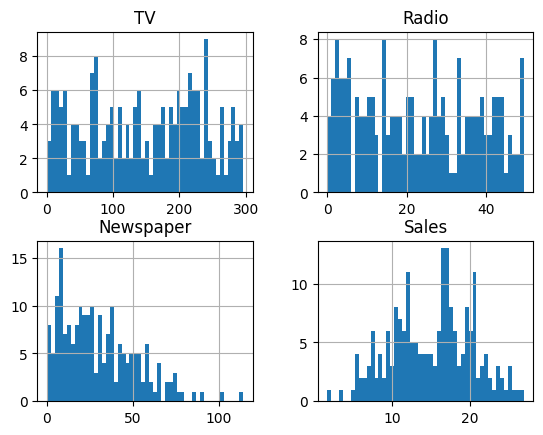

In [43]:
#Data Visualization

data.hist(bins=50)

In [44]:
#Data Splitiong into testing and training

x=data[['TV','Radio','Newspaper']]
y=data['Sales']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

**Linear Regression**

In [46]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
linear_reg_predictions = linear_reg.predict(x_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
print("Linear Regression Predictions:", linear_reg_predictions)
print("Linear Regression MSE:", linear_reg_mse)

Linear Regression Predictions: [10.68909303  8.67371102  9.59969914 24.99989846 14.73590568  8.37604918
 10.70350416 18.37670708  9.9670026  17.87946837 23.52765543 10.70692059
 13.37566958 17.10051561 11.77005197 13.31194616 21.13395461  9.10945664
 14.24009701 18.86885012 25.00670623 12.42508633 16.61899482 13.84289673
  7.80458355 15.13012055 14.69687153 20.70140682 16.9844145   8.94984434
 12.59168427 20.93257626 21.34337227 21.89151357  7.23908022  7.06001103
  9.28335812 15.6840471  13.33894748  7.28903633 11.05676585  9.08768206
 15.60592891 18.21716827 18.9560652  13.47385617  5.36520991 10.59696871
 15.66036131 10.98229096 12.20805533 20.70970272 20.70533061 16.95931925
  9.96622132  9.44413497 23.60505449 15.99066008 18.06706692  8.25675464]
Linear Regression MSE: 3.9380152204802865


**Polynomial Regression**

In [47]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
X_test_poly = poly_features.transform(x_test)
poly_reg_predictions = poly_reg.predict(X_test_poly)
poly_reg_mse = mean_squared_error(y_test, poly_reg_predictions)
print("Polynomial Regression Predictions:", poly_reg_predictions)
print("Polynomial Regression MSE:", poly_reg_mse)

Polynomial Regression Predictions: [10.4231153   8.73271376 10.99750226 24.80649425 15.09368808  8.9931731
  9.56004328 17.88794978  8.75993937 17.82910642 23.86459977 11.04772962
 14.45258064 17.17230943 11.38837015 13.53396031 20.19109463  7.01554582
 14.46515716 18.69714726 25.08911546 13.67859048 16.59786107 13.97743846
  8.84620775 15.36074949 15.11039279 21.78252484 16.95314959  7.7183407
 13.44919091 22.54295749 19.48434933 22.03918746  6.36422233  6.57232611
  9.36979078 15.81604803 13.0906925   6.99370929 10.1883715   8.16230808
 15.82622182 18.05593568 18.59834264 13.47874661  6.0409895   9.82339288
 16.30290043 11.81149058 12.47473366 20.71765166 19.66710411 16.92358478
  9.11112692  9.56666144 21.99148996 16.00920042 17.82058805  6.51478714]
Polynomial Regression MSE: 2.56516590086676


**Ridge Regression**

In [48]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)
ridge_reg_predictions = ridge_reg.predict(x_test)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_predictions)
print("Ridge Regression Predictions:", ridge_reg_predictions)
print("Ridge Regression MSE:", ridge_reg_mse)

Ridge Regression Predictions: [10.68909577  8.67373073  9.59974079 24.99986877 14.73593634  8.37608415
 10.70347792 18.37672668  9.96699803 17.87946143 23.52762702 10.70694205
 13.37569961 17.10051111 11.77004463 13.31194679 21.13394677  9.10942174
 14.24005684 18.86883997 25.00668339 12.4251183  16.61899667 13.84290837
  7.80462216 15.13009362 14.6968913  20.70136141 16.98444626  8.94984828
 12.59169486 20.93253891 21.34338985 21.89148192  7.23910507  7.06003249
  9.2833866  15.6840811  13.33891256  7.28906217 11.05675437  9.08767172
 15.60591144 18.21716468 18.95607437 13.47383739  5.36524133 10.5969576
 15.66035634 10.98232668 12.20807393 20.70970197 20.70533232 16.95931992
  9.96621569  9.44415252 23.60504753 15.99066983 18.06706856  8.25675378]
Ridge Regression MSE: 3.938007513471864


**Lasso Regression**

In [49]:
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(x_train, y_train)
lasso_reg_predictions = lasso_reg.predict(x_test)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_predictions)
print("Lasso Regression Predictions:", lasso_reg_predictions)
print("Lasso Regression MSE:", lasso_reg_mse)

Lasso Regression Predictions: [10.70525472  8.70680989  9.64879686 24.94418484 14.75963976  8.41128396
 10.62606808 18.41934282  9.92148798 17.8896808  23.46940935 10.73283606
 13.42981498 17.11865071 11.77151563 13.33330558 21.15874078  9.09970991
 14.1819578  18.87701806 24.93414232 12.48048696 16.61824666 13.8486818
  7.85302528 15.12309195 14.73002977 20.66705225 17.03135197  8.93878314
 12.50559213 20.85983123 21.35113254 21.86642572  7.24169508  7.08934316
  9.29669707 15.68432825 13.29770473  7.31543104 11.00462014  9.1096251
 15.607934   18.23465622 18.93227325 13.47970993  5.43029681 10.51796479
 15.5983514  11.01249567 12.22427242 20.65683325 20.70555177 16.96824772
  9.97159587  9.4750909  23.58115784 15.99872075 18.06578229  8.24324242]
Lasso Regression MSE: 3.9227412462996387


**Decision Tree Regression**

In [50]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
dt_reg_predictions = dt_reg.predict(x_test)
dt_reg_mse = mean_squared_error(y_test, dt_reg_predictions)
print("Decision Tree Regression Predictions:", dt_reg_predictions)
print("Decision Tree Regression MSE:", dt_reg_mse)

Decision Tree Regression Predictions: [11.3  9.7 13.2 25.5 16.7 12.6 12.  18.4  7.  17.4 25.4 11.  15.6 19.7
 11.3 11.5 20.9  9.5 12.6 17.4 25.5 14.  17.1 11.9  9.4 16.  17.5 22.3
 16.5  7.3 12.6 23.8 18.9 21.5  7.   6.6  9.7 17.1 12.   6.6  7.   5.7
 15.5 20.2 17.4 14.2  3.2 12.  16.  10.6 12.2 20.8 18.9 19.9  9.6  9.7
 18.9 17.1 17.4  6.6]
Decision Tree Regression MSE: 3.9046666666666665


**Random Forest Regression**

In [51]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
rf_reg_predictions = rf_reg.predict(x_test)
rf_reg_mse = mean_squared_error(y_test, rf_reg_predictions)
print("Random Forest Regression Predictions:", rf_reg_predictions)
print("Random Forest Regression MSE:", rf_reg_mse)

Random Forest Regression Predictions: [11.168 10.53  11.522 25.281 16.878 11.311  9.625 17.987  8.716 17.987
 24.876 11.468 15.632 18.742 11.545 12.961 20.385  7.253 13.997 17.894
 25.206 12.201 17.335 12.247 10.902 14.308 17.153 22.377 16.461  7.641
 12.754 23.471 20.323 22.301  6.206  6.78  10.671 17.401 13.197  7.115
 10.287  7.678 14.365 18.546 18.368 13.424  5.429 10.367 14.9   11.623
 11.792 20.202 20.238 19.277 10.323 11.055 20.426 17.589 18.597  6.291]
Random Forest Regression MSE: 2.427126983333335


**Gradient Boosting Regression**

In [52]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train, y_train)
gb_reg_predictions = gb_reg.predict(x_test)
gb_reg_mse = mean_squared_error(y_test, gb_reg_predictions)
print("Gradient Boosting Regression Predictions:", gb_reg_predictions)
print("Gradient Boosting Regression MSE:", gb_reg_mse)

Gradient Boosting Regression Predictions: [11.11253694 10.30940388 11.18945237 25.54051936 15.28044924 11.13696578
 10.58077609 19.06116573 10.00220721 18.85853561 24.79448678 11.48775325
 13.81719078 18.88145785 11.49094701 12.46277905 21.06558123  5.9757832
 13.81284383 18.47217513 25.30919302 11.11227058 17.41303449 13.39038816
 10.36737603 14.25397955 16.49674448 21.96386056 15.94972011  7.66731097
 12.8683859  23.42267889 20.42826038 22.34821322  5.69984749  6.64230542
 10.62786699 18.35396486 12.70075477  7.26538526 10.35167244  7.62350246
 14.70377676 18.85853561 18.86221795 13.75711528  5.25203162 11.18449967
 15.0608388  11.90396091 11.55283866 19.74380736 20.17926534 18.83232291
  9.88718628 10.81141385 20.66060961 17.04769242 18.76453674  5.75756427]
Gradient Boosting Regression MSE: 2.536331073782622


**Support Vector Regression**

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
svr_reg = SVR()
svr_reg.fit(X_train_scaled, y_train)
svr_reg_predictions = svr_reg.predict(X_test_scaled)
svr_reg_mse = mean_squared_error(y_test, svr_reg_predictions)
print("Support Vector Regression Predictions:", svr_reg_predictions)
print("Support Vector Regression MSE:", svr_reg_mse)

Support Vector Regression Predictions: [ 9.85717369  8.91712768 10.79081063 22.2120083  14.96618597  9.27437038
 13.93578604 17.92655776 12.3378776  17.79727214 22.30382834 10.23382537
 14.63315962 17.14725109 10.72575517 12.94873002 19.12136066 10.26123472
 14.79710252 18.63485262 21.29434537 13.82192481 16.33910465 13.30577682
  9.4896225  14.99208964 14.92516726 21.30595419 17.03329146  9.91041866
 15.76066401 20.88527672 18.92352525 21.44225957 10.37025276  8.31446674
 10.23714847 16.41373913 13.40000275  8.53895783 12.77208627  9.98726543
 15.48156265 18.07193937 18.80027852 13.05668426 11.03755372 14.54430317
 16.27337161 11.33417811 11.64420131 20.04970692 19.40178821 16.78505312
  9.27308127  9.30298242 20.53233223 15.74043249 17.78762651  9.75882082]
Support Vector Regression MSE: 6.8109180666022615


**Gradient Descent**

In [54]:
gd_reg = make_pipeline(StandardScaler(), SGDRegressor())
gd_reg.fit(x_train, y_train)
gd_reg_predictions = gd_reg.predict(x_test)
gd_reg_mse = mean_squared_error(y_test, gd_reg_predictions)
print("Gradient Descent Regression Predictions:", gd_reg_predictions)
print("Gradient Descent Regression MSE:", gd_reg_mse)

Gradient Descent Regression Predictions: [10.67259324  8.66887911  9.60318538 24.95207506 14.72850227  8.38406259
 10.70871807 18.34037983  9.97693641 17.83786852 23.48623046 10.70158361
 13.35629791 17.05921013 11.74925002 13.283839   21.07540074  9.07787339
 14.21401324 18.82280604 24.9731482  12.40936487 16.59387182 13.8305535
  7.81072298 15.08749997 14.67551775 20.64124092 16.96021031  8.95270602
 12.62764855 20.89783002 21.31454998 21.83527437  7.25778557  7.06298467
  9.29422357 15.68858623 13.31142819  7.29660353 11.06108519  9.06145781
 15.56562389 18.17390002 18.94229894 13.43636643  5.36356646 10.61624327
 15.66254423 10.98630889 12.20097293 20.6970972  20.66838916 16.92742852
  9.94989367  9.43639222 23.56473052 15.96965789 18.03805857  8.25862118]
Gradient Descent Regression MSE: 3.933647281042696


**Performance** (A lower MSE indicates better performance)

In [55]:
print("Linear Regression MSE:", linear_reg_mse)
print("Polynomial Regression MSE:", poly_reg_mse)
print("Ridge Regression MSE:", ridge_reg_mse)
print("Lasso Regression MSE:", lasso_reg_mse)
print("Decision Tree Regression MSE:", dt_reg_mse)
print("Random Forest Regression MSE:", rf_reg_mse)
print("Gradient Boosting Regression MSE:", gb_reg_mse)
print("Support Vector Regression MSE:", svr_reg_mse)
print("Gradient Descent Regression MSE:", gd_reg_mse)

Linear Regression MSE: 3.9380152204802865
Polynomial Regression MSE: 2.56516590086676
Ridge Regression MSE: 3.938007513471864
Lasso Regression MSE: 3.9227412462996387
Decision Tree Regression MSE: 3.9046666666666665
Random Forest Regression MSE: 2.427126983333335
Gradient Boosting Regression MSE: 2.536331073782622
Support Vector Regression MSE: 6.8109180666022615
Gradient Descent Regression MSE: 3.933647281042696


In [56]:
# Initialize the best MSE variable
best_mse = float('inf') # It should be an initial value that is higher than the maximum possible MSE to ensure that the first model's MSE is assigned correctly.
best_model = None

# Compare the MSE values and find the best model
if linear_reg_mse < best_mse:
    best_mse = linear_reg_mse
    best_model = "Linear Regression"

if poly_reg_mse < best_mse:
    best_mse = poly_reg_mse
    best_model = "Polynomial Regression"

if ridge_reg_mse < best_mse:
    best_mse = ridge_reg_mse
    best_model = "Ridge Regression"

if lasso_reg_mse < best_mse:
    best_mse = lasso_reg_mse
    best_model = "Lasso Regression"

if dt_reg_mse < best_mse:
    best_mse = dt_reg_mse
    best_model = "Decision Tree Regression"

if rf_reg_mse < best_mse:
    best_mse = rf_reg_mse
    best_model = "Random Forest Regression"

if gb_reg_mse < best_mse:
    best_mse = gb_reg_mse
    best_model = "Gradient Boosting Regression"

if svr_reg_mse < best_mse:
    best_mse = svr_reg_mse
    best_model = "Support Vector Regression"

if gd_reg_mse < best_mse:
    best_mse = gd_reg_mse
    best_model = "Gradient Descent Regression"

print("The best model is:", best_model)


The best model is: Random Forest Regression
